# **GPT - nano 10M parameters version**
This Notebook contains an example usage of the custom GPT project. The following parameters of the architecture could be changed in the config.py


*   num_transformer_blocks : This is the number of transformer decoder blocks stacked on top of each other. This example usage has 6 transformer decoder blocks stacked on top of one another.

*   heads : The number of heads in the multi-head-self-attention layer. This example usage has 6 heads.
*   n_embd : The dimensionality of the vector space in which the word-embeddings reside. in this example usage n_embd is 384.


*   block_size : The maximum context length that is passed onto the model. Here the block_size is 256.



# **Step 1**
Import Necessary libraries and scripts

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from model import FinalModel
from data import prepare_data, get_batch
from train import trainer
from config import batch_size, lr, device, block_size, epochs, save_path, temperature, top_k
from inference import generate

# **Step 2**
Tokenise and split the data into train and validation sets. This implementation uses a simple character level tokeniser. The train_split parameter in config.py could be altered for getting the required split. Here we use 0.9 (90% of the data is used for training, rest for validation).

In [2]:
train_data, val_data,encode,decode,vocab = prepare_data()

## **Step 3**
Initiate the model.

In [10]:
model = FinalModel(len(vocab)).to(device)

We observe our model has ~10M parameters

In [4]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

10806616

# **Step 5**

Train the model. The trainer function has a pytorch training loop implemented with each epoch consisting of updating the parameters based on the loss on *batch_size*(can be altered in config.py) examples.

Training Epochs:   0%|          | 0/20000 [00:00<?, ?it/s]

Epoch 1/20000 | Train Loss: 4.5617 | Val Loss: 4.1127 | Val Acc: 0.1199 | Val PPL: 61.1106
Epoch 1001/20000 | Train Loss: 2.2441 | Val Loss: 2.1768 | Val Acc: 0.3461 | Val PPL: 8.8176
Epoch 2001/20000 | Train Loss: 1.8264 | Val Loss: 1.7695 | Val Acc: 0.4701 | Val PPL: 5.8678
Epoch 3001/20000 | Train Loss: 1.6481 | Val Loss: 1.6115 | Val Acc: 0.5087 | Val PPL: 5.0101
Epoch 4001/20000 | Train Loss: 1.5599 | Val Loss: 1.5363 | Val Acc: 0.5360 | Val PPL: 4.6473
Epoch 5001/20000 | Train Loss: 1.5007 | Val Loss: 1.4966 | Val Acc: 0.5432 | Val PPL: 4.4667
Epoch 6001/20000 | Train Loss: 1.4005 | Val Loss: 1.3939 | Val Acc: 0.5773 | Val PPL: 4.0304
Epoch 7001/20000 | Train Loss: 1.3470 | Val Loss: 1.3971 | Val Acc: 0.5757 | Val PPL: 4.0435
Epoch 8001/20000 | Train Loss: 1.3287 | Val Loss: 1.3814 | Val Acc: 0.5847 | Val PPL: 3.9805
Epoch 9001/20000 | Train Loss: 1.2927 | Val Loss: 1.3575 | Val Acc: 0.5900 | Val PPL: 3.8865
Epoch 10001/20000 | Train Loss: 1.2468 | Val Loss: 1.3459 | Val Acc: 0.5

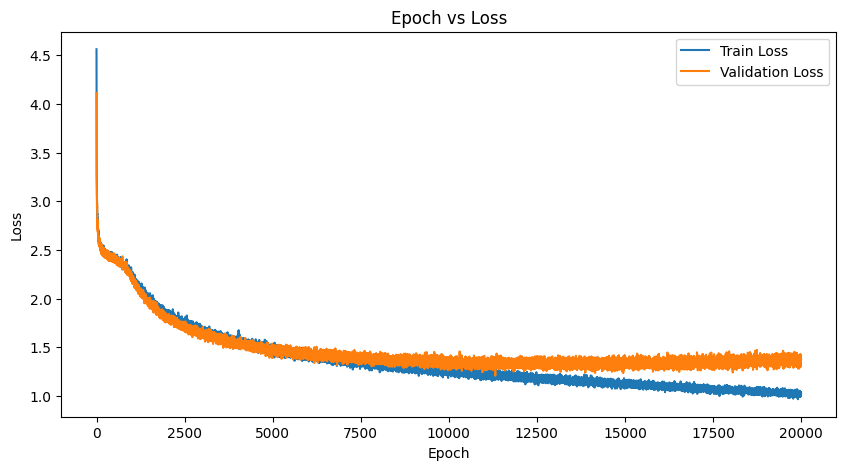

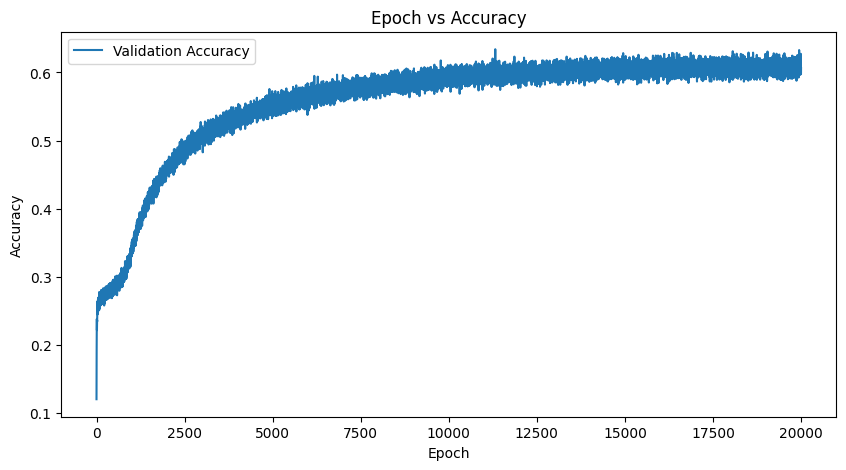

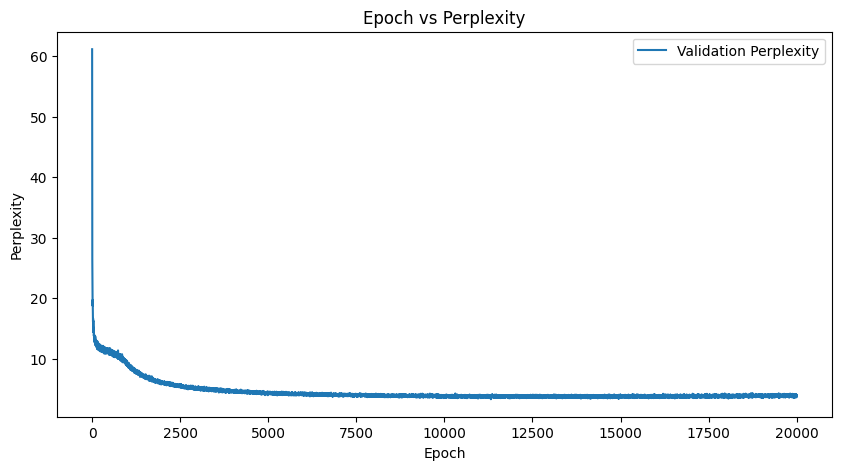

In [4]:
trainer(model,train_data,val_data,batch_size,lr,epochs,block_size,save_path)

The above function automatically saves the best model to ./models/best_model.pth. We have experimented with 20,000 epochs with the model starting to overfit at ~12,000 epochs. I tried to train few more epochs with a decayed learning rate but that didn't help much. We will have the model that was there at ~12,000 epochs saved.

# **Step 6**
Load the best model for inference.

In [5]:
base_model = FinalModel(len(vocab)).to(device)

In [6]:
base_model.load_state_dict(torch.load('models/best_model.pth'))

<All keys matched successfully>

# **Step 7**

We generate 250 tokens from the model as a sample. Even though the model output is not grammatically and contextually accurate, Our model has learned the words accurately with just ~500,000 tokens. This model is reasonably small (The earliest GPT, GPT-1 has ~117M parameters compared to 10M in this demonstration) so it cannot learn complex patterns even with a lot of tokens. Increasing both model size and token corpus come at the cost of computation. This code can be used without any changes on a computationally good setup and can provide much better results.

In [9]:
generate(vocab,base_model,encode,decode,250)

'\n“I think that I have heard a pitch of a considerable between the\ncomplain of the problem crime and examined darkness. He was the last pennies\nand the table which was a small with his pockets of the nature of the\nson’s account, and the world was the s'

The sampling parameters like top_k, temperature can also be adjusted in config.py